# Simulator for NUM problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

Function definition

In [2]:
def generate_coeff(source):
    """ Generate random coefficients for the utility function """    
    
    return np.random.rand(source)

In [3]:
def generate_link(link):
    """ Generate random link capacity """

    scale = 1000
    return scale * np.random.rand(link)

In [4]:
def generate_path(source, path, link):
    """ Generate random paths """
    
    x = np.zeros((source, np.max(path), link))
    for i in range(source):
        x[i,:,:] = np.round(np.random.rand(path[i], link))

    return x

We set the initial solution as
\begin{equation}
    x^{(0)}_{s,p}=\min_{l\in L}\left\{ \frac{0,9\cdot c_l}{\sum_{s,p}\mathbf{1}_{s,p\ni l}}\right\}, \qquad \forall s\in S, p\in P_s
\end{equation}

In [5]:
def initial_solution(x, cl):
    """ Compute an initial feasible solution """
    
    return x * np.min((0.9 * cl)/ np.sum(np.sum(x, axis=1), axis=0))

We use the following utility function:
\begin{equation}
    \sum_{s\in S}a_s\cdot\log\left(\sum_{p\in P_s}x_{s,p}\right), \qquad a_s\in [0, 1].
\end{equation}

In [6]:
def compute_utility(x, source, coeff):
    """ Compute the utility at the current iteration """
    
    return sum(coeff * np.log(np.sum(np.max(x, axis=2), axis=1)))

In [7]:
def backtracking_stepsize():
    """ Compute backtracking line search for the step size at the current iteration """
    
    return

In [8]:
def plot_utility(y):
    """ Plot utility value per iteration """
    
    fig, ax = plt.subplots()
    ax.plot(np.arange(np.shape(y)[0]), y)
    plt.tight_layout()
    ax.set_title('Utility')
    plt.show()

We use the logarithmic barrier function
\begin{equation}
    \quad B_l({y}) = \begin{cases} -\log(c_l - y), & \mbox{if } {y}< c_l, \\ \infty, & \mbox{if } {y}\geq c_l. \end{cases}
\end{equation}

The gradient step for the exponentiated gradient descent is
\begin{equation}
    x_{s,p}^{(k+1)} = x_{s,p}^{(k)}\cdot \exp \left\{\eta^{(k)}\cdot \left[U_s'\left(x^{(k)}_{s,p}\right) - \sum_{l:l\in s,p}\frac{\mu^{(k)}}{\sum x^{(k)}_{s,p} - c_l}\right]\right\}
\end{equation}

In [9]:
def gradient_step(old_x, source, link, path, step_size, barrier, cl):
    """ Compute the gradient step at the current iteration """
    
    # We approximate infinity with a large value
    INF = np.power(10, 10)
    
    # Compute price
    price = np.zeros((source, np.max(path)))
    link_price = 1 / (cl - np.sum(np.sum(old_x, axis=1), axis=0))
    link_price[link_price == np.inf] = INF 
    for s in range(source):
        for p in range(path[s]):
            price[s, p] = np.dot((old_x[s, p, :] > 0).astype(int), link_price)

    # Gradient step
    x = np.max(old_x, axis=2) * np.exp(step_size * (1 / np.max(old_x, axis=2) - price))
    return np.tile(x, (link, 1, 1)).transpose(1, 2, 0) * (old_x > 0).astype(int)

Variable initialization

In [26]:
# Max number of iterations
max_iter =  100

# Number of OD pairs
source = 4

# Number of paths per OD pair
path = 2 * np.ones(source, dtype='int32')

# Number of links
link = 5

In [11]:
# Define utility
coeff = np.random.rand(source)

# Generate link capacity
cl = generate_link(link)

# Generate paths
x0 = generate_path(source, path, link)

Body of the simulator

In [27]:
# Fixed step size
step_size = 10
barrier = 10

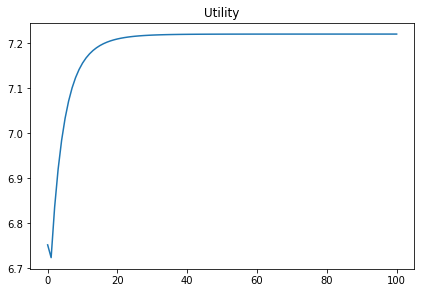

In [28]:
# Initial feasible solution
x = initial_solution(x0, cl)
utility = np.zeros((max_iter + 1))

utility[0] = compute_utility(x, source, coeff)
for i in range(max_iter):
#    step_size = backtracking_stepsize()    Uncomment to use backtracking line search
    x = gradient_step(x, source, link, path, step_size, barrier, cl)
    utility[i + 1] = compute_utility(x, source, coeff)
        
# Plot utility
plot_utility(utility)